In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import ast
import csv
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from collections import OrderedDict

In [2]:
df = pd.read_csv('ted_main.csv')
df.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views', 'year', 'tagwc', 'year_int'],
      dtype='object')

In [3]:
# import datetime 

# df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%y-%m-%d'))

# df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%y-%m-%d'))

# Most Viewed Talks of All Time

In [4]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:5]

In [5]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

# The correlation of number of views and the number of comments

In [6]:
sns.jointplot(x='views', y='comments', data=df)


In [7]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


# 5 Most commented of all time

In [8]:
df[['title', 'main_speaker', 'views', 'comments']].sort_values('comments', ascending=False).head()

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673


In [9]:
df['year'] = df['published_date'].apply(lambda x: x.split('-')[0])
date_df = df.groupby('year').apply(pd.DataFrame.sort_values, 'year', ascending=False)

In [10]:
df.to_csv('ted_main.csv', index=False)

In [11]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)

In [12]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
is_string_dtype(df['year'])

True

# Data for the year 2015

In [13]:
df_year15 = df[df.year == '15']

In [14]:
df_sort_comments = df_year15.sort_values('views', ascending=False)

df_sort_comments[['main_speaker', 'published_date', 'comments', 'views', 'year']].head()

,main_speaker,published_date,comments,views,year
2109,Robert Waldinger,15-12-23,527,16601927,15
1940,Monica Lewinsky,15-03-20,1355,11443190,15
2076,Daniel Levitin,15-10-30,129,9163813,15
1981,Esther Perel,15-05-21,370,8218896,15
2011,Johann Hari,15-07-09,767,7841509,15


# The correlation between the number of comments and the number of views for the year 2015

In [15]:
sns.jointplot(x='comments', y='views', data=df_year15)

# The correlation between the number of comments & the number of views in 100 most viewed videos for the year 2015

In [16]:
df_views = df.sort_values('views', ascending=False).head(100)

In [17]:
sns.jointplot(x='comments', y='views', data=df_views)

# The correlation between the number of views and the number of comments from 2015

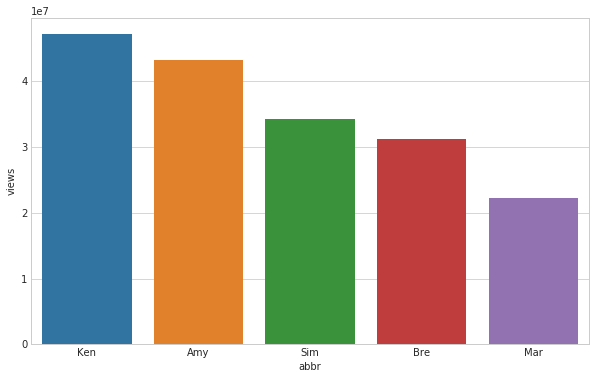

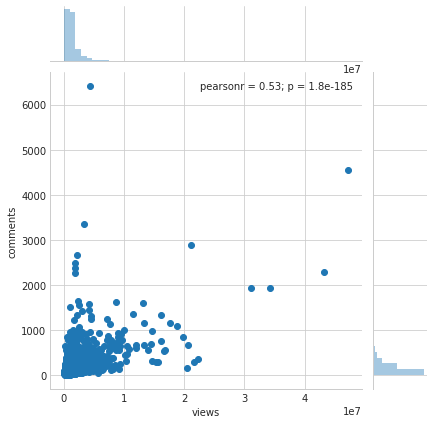

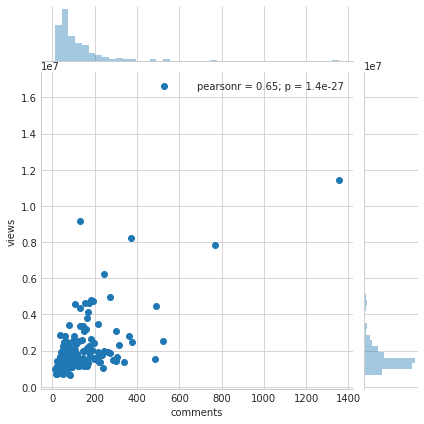

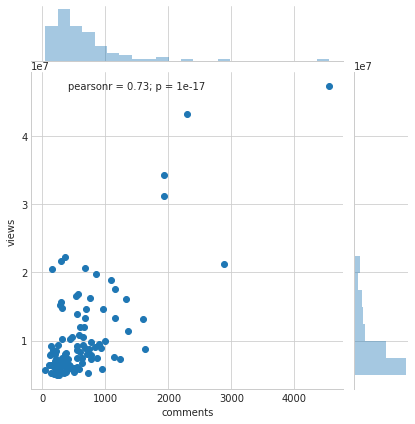

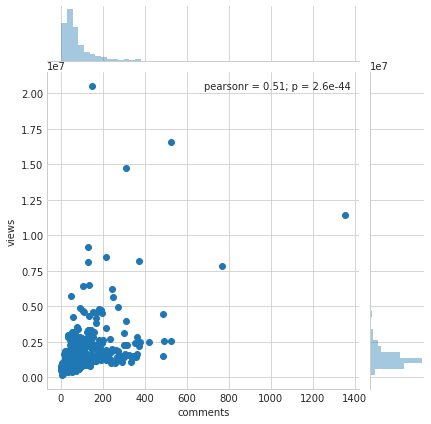

In [18]:
sns.jointplot(x='comments', y='views', data=df[df['year'] > "14"])
plt.show()

# The correlation between the number of views and the speed of speech

In [19]:
df2 = pd.read_csv('transcripts.csv')

In [20]:
df3 = pd.merge(left=df, right=df2, how='left', left_on='url', right_on='url')

In [21]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x: len(x.split()))

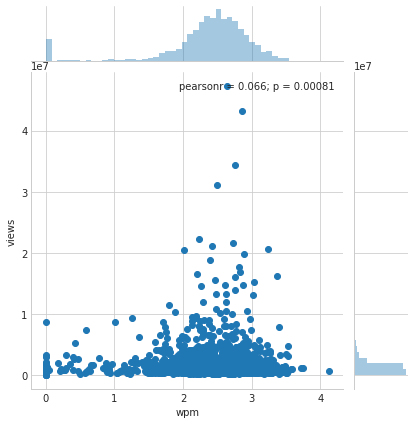

In [22]:
df['duration'] = df['duration']/60
df3['wpm'] = df3['wc']/df3['duration']
sns.jointplot(x='wpm', y='views', data=df3)
plt.show()

# The correlation between comments and date

In [23]:
df[['year_int']]= df[['year']].apply(pd.to_numeric)

In [24]:
sns.jointplot(x='year_int', y='comments', data=df)

# Finding the communities and most important features

In [25]:
df['tags'] = df['tags'].fillna('')
df['tagwc'] = df['tags'].apply(lambda x: len(x.split(',')))

In [26]:
df[['main_speaker', 'tags', 'tagwc']].head()

,main_speaker,tags,tagwc
0,Ken Robinson,"['children', 'creativity', 'culture', 'dance',...",7
1,Al Gore,"['alternative energy', 'cars', 'climate change...",9
2,David Pogue,"['computers', 'entertainment', 'interface desi...",9
3,Majora Carter,"['MacArthur grant', 'activism', 'business', 'c...",9
4,Hans Rosling,"['Africa', 'Asia', 'Google', 'demo', 'economic...",11


# 5 Most repeated tags

In [27]:
df_tags = pd.Series(' , '.join(df['tags']).lower().split(',')).value_counts()
df_tags.head()

 'technology']      509
 'global issues'    460
 'science'          423
 'design'           384
 'culture'          375
dtype: int64

# Sample Dictionary

In [28]:
mydict = dict(zip(df.views, df.tags))

In [29]:
mydict.keys()

dict_keys([47227110, 3200520, 1636292, 1697550, 12005869, 20685401, 3769987, 967741, 2567958, 3095993, 1211416, 387877, 693341, 4531020, 358304, 2702470, 1628912, 1415724, 1074081, 1106561, 966439, 6141440, 518624, 9260764, 1131864, 1096862, 2885999, 2863214, 7023562, 14689301, 10000702, 1030267, 3277740, 503517, 705389, 580891, 809226, 2028451, 745231, 718649, 975107, 382996, 1053758, 5364639, 2434344, 1536873, 904215, 10841210, 1813665, 2299265, 673036, 1391142, 2532851, 882034, 2121177, 1090180, 684519, 1409327, 3051507, 978825, 442553, 691814, 2441805, 849859, 1335732, 1262674, 1663001, 5570544, 1520908, 2138907, 680134, 690928, 1762302, 1392010, 660909, 867495, 395769, 761930, 1149090, 762264, 1920434, 560904, 606311, 2197377, 1697185, 1115081, 591379, 398713, 2676717, 4165572, 1426390, 754700, 643078, 513672, 428351, 616385, 4374792, 609087, 443180, 904520, 717002, 1451846, 577502, 1683456, 779873, 940913, 1371482, 870412, 4772595, 805111, 1044185, 1479503, 1493606, 404402, 11360

# Complete Dictionary

In [105]:
b = dict(zip(df['views'], df[['duration', 'comments', 'published_date', 'year_int', 'tags', 'title', 'main_speaker']].values.tolist()))
b

{47227110: [19.4,
  4553,
  '06-06-26',
  6,
  "['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",
  'Do schools kill creativity?',
  'Ken Robinson'],
 3200520: [16.283333333333335,
  265,
  '06-06-26',
  6,
  "['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']",
  'Averting the climate crisis',
  'Al Gore'],
 1636292: [21.433333333333334,
  124,
  '06-06-26',
  6,
  "['computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'technology']",
  'Simplicity sells',
  'David Pogue'],
 1697550: [18.6,
  200,
  '06-06-26',
  6,
  "['MacArthur grant', 'activism', 'business', 'cities', 'environment', 'green', 'inequality', 'politics', 'pollution']",
  'Greening the ghetto',
  'Majora Carter'],
 12005869: [19.833333333333332,
  593,
  '06-06-27',
  6,
  "['Africa', 'Asia', 'Google', 'demo', 'economics', 'global development', 

# 1. Dictionary based on 'technology' tag

In [31]:
sum = 0
for k, v in b.items():
    if 'technology' in v[4]:
        sum += k
print('Sum of technology:', sum)

Sum of technology: 1052207570


# List of view for each tag

In [71]:
total_views = []
sum = 0  
for k, v in b.items():       
    if 'technology' in v[4]:
        sum += k
total_views.append({'Technology': sum})
sum = 0
   
for k, v in b.items():       
    if 'global issues' in v[4]:
        sum += k
total_views.append({'Global Issues': sum})
sum = 0
   
for k, v in b.items():       
    if 'science' in v[4]:
        sum += k
total_views.append({'Science': sum})
sum = 0
   
for k, v in b.items():       
    if 'design' in v[4]:
        sum += k
total_views.append({'Design': sum})
sum = 0
   
for k, v in b.items():       
    if 'culture' in v[4]:
        sum += k
total_views.append({'Culture': sum})

print(total_views)

[{'Technology': 1052207570}, {'Global Issues': 633308445}, {'Science': 964419904}, {'Design': 597599846}, {'Culture': 1179826210}]


# Writing to a csv file

In [107]:
import csv

fieldnames = ["tag", "view"]
file = {'Technology': 1052207570, 'Global Issues': 633308445, 'Science': 964419904, 'Design': 597599846, 'Culture': 1179826210}

with open('Ted_Tags.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for k, v in file.items():
        writer.writerow({fieldnames[0]: k, fieldnames[1]: v})

In [34]:
for k, v in b.items():
    if 'technology' in v[4]:
        print(v[0])

16.283333333333335
21.433333333333334
25.833333333333332
8.783333333333333
17.616666666666667
20.016666666666666
18.566666666666666
19.0
18.816666666666666
22.75
15.866666666666667
18.05
26.816666666666666
21.333333333333332
22.933333333333334
20.0
17.433333333333334
14.483333333333333
17.3
24.116666666666667
22.583333333333332
20.183333333333334
20.116666666666667
22.333333333333332
20.066666666666666
16.866666666666667
23.316666666666666
16.85
14.883333333333333
16.416666666666668
20.083333333333332
17.183333333333334
14.3
20.55
3.0833333333333335
20.183333333333334
16.683333333333334
7.5
17.866666666666667
4.65
23.366666666666667
6.166666666666667
17.716666666666665
19.416666666666668
17.166666666666668
16.616666666666667
9.75
4.2
5.166666666666667
17.116666666666667
8.216666666666667
17.6
15.983333333333333
29.7
21.333333333333332
17.15
29.85
6.3
16.05
23.566666666666666
20.566666666666666
22.3
18.933333333333334
15.966666666666667
18.166666666666668
19.4
16.95
16.033333333333335
1

In [35]:
b2 = {k: v for k, v in b.items() if 'technology' in v[4]}

# sorting 'technology' dictionary based on views

In [36]:
OrderedDict(sorted(b2.items(), key = lambda t: t[0]))

OrderedDict([(115346,
              [9.9,
               80,
               '12-02-04',
               12,
               "['TEDx', 'global issues', 'poverty', 'technology']",
               "Let's bridge the digital divide!",
               'Aleph Molinari']),
             (138812,
              [16.366666666666667,
               118,
               '11-11-13',
               11,
               "['Internet', 'TEDx', 'collaboration', 'crowdsourcing', 'data', 'open-source', 'science', 'technology']",
               'Open science now!',
               'Michael Nielsen']),
             (155895,
              [14.483333333333333,
               76,
               '12-01-21',
               12,
               "['Natural resources', 'TEDx', 'alternative energy', 'biotech', 'climate change', 'ecology', 'energy', 'engineering', 'environment', 'future', 'green', 'innovation', 'nature', 'oceans', 'plants', 'science', 'solar energy', 'sustainability', 'synthetic biology', 'technology']",
       

In [37]:
dict2 = OrderedDict(sorted(b2.items(), reverse=True, key = lambda t: t[0]))

# Finding 10 most viewed videos of 'technology' tag with duration

In [38]:
technology1 = {key: value for key, value in list(dict2.items())[0:10]}

# Writing to csv file

In [39]:
df1 = pd.DataFrame(technology1).transpose().reset_index()
df1.columns = ['views', 'duration', 'comments', 'Published_date', 'year', 'tags', 'title', 'speaker']
df1.set_index('views', inplace = True)
df1.to_csv('Ted_Technology.csv')

# 2. Dictionary based on 'global issues' tag

In [40]:
sum = 0
for k, v in b.items():
    if 'global issues' in v[4]:
        sum += k
print('sum of global issues:', sum)

sum of global issues: 633308445


In [41]:
b3 = {k: v for k, v in b.items() if 'global issues' in v[4]}

In [42]:
OrderedDict(sorted(b3.items(), key = lambda t: t[0]))

OrderedDict([(66668,
              [13.6,
               43,
               '12-01-15',
               12,
               "['TEDx', 'disability', 'entertainment', 'global issues', 'live music']",
               'The debut of the British Paraorchestra',
               'Charles Hazlewood + British Paraorchestra']),
             (115346,
              [9.9,
               80,
               '12-02-04',
               12,
               "['TEDx', 'global issues', 'poverty', 'technology']",
               "Let's bridge the digital divide!",
               'Aleph Molinari']),
             (120274,
              [18.633333333333333,
               70,
               '12-02-12',
               12,
               "['TEDx', 'disability', 'global issues', 'military']",
               'Deaf in the military',
               'Keith Nolan']),
             (148971,
              [16.883333333333333,
               46,
               '11-11-05',
               11,
               "['TEDx', 'cities', 'co

In [43]:
dict3 = OrderedDict(sorted(b3.items(), reverse=True, key = lambda t: t[0]))

In [44]:
globalIssues2 = {key: value for key, value in list(dict3.items())[0:10]}

# Writing to csv file

In [45]:
df2 = pd.DataFrame(globalIssues2).transpose().reset_index()
df2.columns = ['views', 'duration', 'comments', 'Published_date', 'year', 'tags', 'title', 'speaker']
df2.set_index('views', inplace = True)
df2.to_csv('Ted_GlobalIssues.csv')

# 3. Dictionary based on 'science' tag:

In [46]:
sum_up = 0
for k, v in b.items():
    if 'science' in v[4]:
        sum_up += k
print('sum of science:', sum_up)

sum of science: 964419904


In [47]:
b4 = {k: v for k, v in b.items() if 'science' in v[4]}

In [48]:
OrderedDict(sorted(b4.items(), key = lambda t: t[0]))

OrderedDict([(138812,
              [16.366666666666667,
               118,
               '11-11-13',
               11,
               "['Internet', 'TEDx', 'collaboration', 'crowdsourcing', 'data', 'open-source', 'science', 'technology']",
               'Open science now!',
               'Michael Nielsen']),
             (155895,
              [14.483333333333333,
               76,
               '12-01-21',
               12,
               "['Natural resources', 'TEDx', 'alternative energy', 'biotech', 'climate change', 'ecology', 'energy', 'engineering', 'environment', 'future', 'green', 'innovation', 'nature', 'oceans', 'plants', 'science', 'solar energy', 'sustainability', 'synthetic biology', 'technology']",
               'Plant fuels that could power a jet',
               'Bilal Bomani']),
             (161462,
              [9.683333333333334,
               41,
               '12-01-08',
               12,
               "['TEDx', 'astronomy', 'collaboration', 'medica

In [49]:
dict4 = OrderedDict(sorted(b4.items(), reverse=True, key = lambda t: t[0]))

In [50]:
science3 = {key: value for key, value in list(dict4.items())[0:10]}

# Writing to csv file

In [51]:
df3 = pd.DataFrame(science3).transpose().reset_index()
df3.columns = ['views', 'duration', 'comments', 'Published_date', 'year', 'tags', 'title', 'speaker']
df3.set_index('views', inplace = True)
df3.to_csv('Ted_Science.csv')

# 4. Dictionary based on 'design' tag:

In [52]:
sum_up = 0
for k, v in b.items():
    if 'design' in v[4]:
        sum_up += k
print('sum of design:', sum_up)

sum of design: 597599846


In [53]:
b5 = {k: v for k, v in b.items() if 'design' in v[4]}

In [54]:
OrderedDict(sorted(b5.items(), key = lambda t: t[0]))

OrderedDict([(132199,
              [11.05,
               84,
               '12-03-17',
               12,
               "['TEDx', 'beauty', 'design', 'industrial design', 'prosthetics']",
               'Beautiful artificial limbs',
               'Scott Summit']),
             (142164,
              [19.85,
               99,
               '12-03-18',
               12,
               "['TEDx', 'architecture', 'cities', 'design', 'social change', 'sustainability']",
               'Victims of the city',
               'Mark Raymond']),
             (197139,
              [22.8,
               29,
               '08-10-21',
               8,
               "['demo', 'design', 'drones', 'flight', 'green', 'solar energy', 'technology', 'transportation']",
               'Nature vs. humans',
               'Paul MacCready']),
             (220716,
              [17.366666666666667,
               59,
               '12-03-24',
               12,
               "['TEDx', 'data', 'desi

In [55]:
dict5 = OrderedDict(sorted(b5.items(), reverse=True, key = lambda t: t[0]))

In [56]:
design4 = {key: value for key, value in list(dict5.items())[0:10]}

# Writing to csv file

In [57]:
df4 = pd.DataFrame(design4).transpose().reset_index()
df4.columns = ['views', 'duration', 'comments', 'Published_date', 'year', 'tags', 'title', 'speaker']
df4.set_index('views', inplace = True)
df4.to_csv('Ted_Design.csv')

# 4. Dictionary based on 'culture' tag:

In [58]:
sum_up = 0
for k, v in b.items():
    if 'culture' in v[4]:
        sum_up += k
print('sum of culture:', sum_up)

sum of culture: 1179826210


In [59]:
b6 = {k: v for k, v in b.items() if 'culture' in v[4]}

In [60]:
OrderedDict(sorted(b6.items(), key = lambda t: t[0]))

OrderedDict([(125050,
              [10.533333333333333,
               70,
               '12-01-07',
               12,
               "['TEDx', 'culture', 'politics']",
               'Change our culture, change our world',
               'Nate Garvis']),
             (144044,
              [11.85,
               43,
               '12-07-29',
               12,
               "['TEDx', 'culture', 'disability', 'journalism', 'personal growth', 'photography', 'storytelling', 'violence', 'war']",
               'When a reporter becomes the story',
               'Giles Duley']),
             (148971,
              [16.883333333333333,
               46,
               '11-11-05',
               11,
               "['TEDx', 'cities', 'collaboration', 'culture', 'global issues', 'journalism', 'social media']",
               'How mobile phones helped solve two murders',
               'Paul Lewis']),
             (186308,
              [5.083333333333333,
               175,
           

In [61]:
dict6 = OrderedDict(sorted(b6.items(), reverse=True, key = lambda t: t[0]))

In [62]:
culture5 = {key: value for key, value in list(dict6.items())[0:10]}

# Writing to a csv file

In [64]:
df5 = pd.DataFrame(culture5).transpose().reset_index()
df5.columns = ['views', 'duration', 'comments', 'Published_date', 'year', 'tags', 'title', 'speaker']
df5.set_index('views', inplace = True)
df5.to_csv('Ted_Culture.csv')